In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### 1. Frame the problem and look at the big picture


How to idientify handwritten digits?

### 2. Get the Data

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### 3. Explore the data to gain insights

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
# Capture the data and target into X, y variables respectively.
X, y = mnist.data, mnist.target
X.shape

(70000, 784)

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y.shape

(70000,)

In [7]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
y[0]

'5'

In [9]:
y = y.astype(np.uint8)

### 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

In [10]:
# Split the data into a train and a test set.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### 5. Explore many different models and short-list the best ones

#### Stochastic Gradient Descent classifier

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=51)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=51)

#### Support Vector Mchine classifier

In [13]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto', random_state=51)
svm_clf.fit(X_train[:10000], y_train[:10000])

KeyboardInterrupt: 

#### K-nearest neighbors (KNN) classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

#### Performance Measures


#### Cross-validation predictions

In [14]:
from sklearn.model_selection import cross_val_predict

In [15]:
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

#### Precision and Recall

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
macro_averaged_precision = precision_score(y_train, sgd_pred, average = 'macro')
print(f"Macro-Averaged Precision score using sklearn library : {macro_averaged_precision}")
micro_averaged_precision = precision_score(y_train, sgd_pred, average = 'micro')
print(f"Micro-Averaged Precision score using sklearn library : {micro_averaged_precision}")

Macro-Averaged Precision score using sklearn library : 0.8737449759375411
Micro-Averaged Precision score using sklearn library : 0.8740666666666667


In [21]:
macro_averaged_recall = recall_score(y_train, sgd_pred, average = 'macro')
print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")
micro_averaged_recall = recall_score(y_train, sgd_pred, average = 'micro')
print(f"Micro-Averaged recall score using sklearn library : {micro_averaged_recall}")

Macro-averaged recall score using sklearn : 0.872590903272261
Micro-Averaged recall score using sklearn library : 0.8740666666666667


#### F1 Score

In [24]:
macro_averaged_f1 = f1_score(y_train, sgd_pred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")
micro_averaged_f1 = f1_score(y_train, sgd_pred, average = 'micro')
print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

Macro-Averaged F1 score using sklearn library : 0.8723946011621375
Micro-Averaged F1 score using sklearn library : 0.8740666666666667


#### Area under the ROC curve

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, sgd_pred, multi_class='ov', average='macro')

AxisError: axis 1 is out of bounds for array of dimension 1

#### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
sgd_conf_mx = confusion_matrix(y_train, sgd_pred)
sgd_conf_mx

array([[5570,    1,   71,   20,   12,   68,   50,   11,   74,   46],
       [   2, 6519,   46,   38,    7,   20,   10,   10,   67,   23],
       [  85,   99, 5153,  115,   77,   56,   95,   59,  169,   50],
       [  60,   49,  225, 4960,   18,  440,   28,   54,  146,  151],
       [  15,   38,   36,   19, 5108,   32,   54,   31,   71,  438],
       [  67,   26,   57,  180,   68, 4538,  131,   17,  221,  116],
       [  48,   27,   77,    7,   40,  105, 5514,    6,   86,    8],
       [  34,   33,   83,   37,  103,   27,    3, 5459,   36,  450],
       [  47,  232,  152,  216,   64,  399,   46,   30, 4459,  206],
       [  35,   34,   26,   82,  323,   85,    3,  142,   55, 5164]])

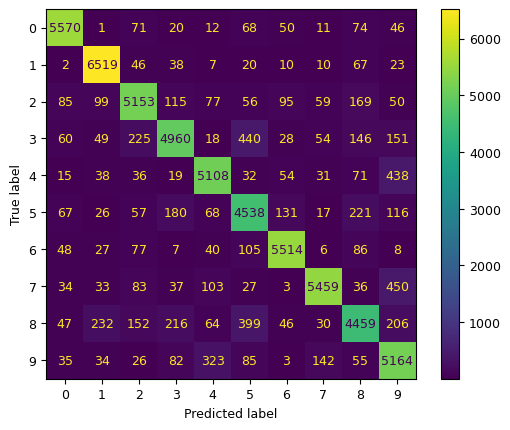

In [27]:
# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, sgd_pred)
plt.show()

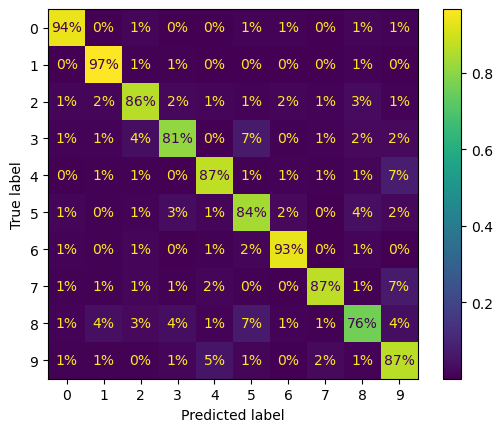

In [28]:
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, sgd_pred,
                                        normalize="true", values_format=".0%")
plt.show()

In [ ]:
#from sklearn import metrics
#sgd_acc_mx = metrics.accuracy_score(y_test, sgd_pred)